In [3]:
from datetime import datetime
from datetime import timezone
import polars as pl
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


start_date = datetime(2023, 10, 9, 0, 0, 0).replace(tzinfo=timezone.utc)
end_date = datetime(2023, 10, 16, 23, 59, 59).replace(tzinfo=timezone.utc)

sensor_id = 7

acropolis_path = "/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/quickflow/acropolis/"
picarro_path = r"/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Database/PICARRO"

#Calibration
# after 23.10
picarro_slope = 1.006374633215469
picarro_intercept = 0.0709482571842841

acropolis_slope = 1.0152349390923814
acropolis_intercept = -11.496181351645532

In [4]:
df = pl.scan_parquet(os.path.join(acropolis_path, "pivot_measurements.parquet"))

df_a = df.filter(pl.col("system_name") == f"tum-esm-midcost-raspi-{sensor_id}" ).sort("creation_timestamp").filter(pl.col("creation_timestamp").is_between(start_date, end_date))

df_a = df_a.with_columns(((pl.col("gmp343_compensated")) * acropolis_slope + acropolis_intercept).alias("gmp343_compensated_corr"))
#df_a = df_a.with_columns((pl.col("gmp343_compensated")).alias("gmp343_compensated_corr"))


df_a.tail(3).collect()

system_name,revision,creation_timestamp,receipt_timestamp,wxt532_direction_min,wxt532_speed_min,wxt532_last_update_time,wxt532_speed_avg,wxt532_direction_avg,wxt532_direction_max,wxt532_speed_max,gmp343_compensated,bme280_humidity,sht45_temperature,bme280_pressure,sht45_humidity,gmp343_raw,bme280_temperature,gmp343_filtered,gmp343_temperature,enclosure_bme280_humidity,raspi_cpu_usage,enclosure_bme280_pressure,raspi_cpu_temperature,raspi_disk_usage,raspi_memory_usage,enclosure_bme280_temperature,cal_gmp343_compensated,cal_gmp343_raw,cal_bme280_temperature,cal_gmp343_filtered,cal_sht45_temperature,cal_bme280_pressure,cal_sht45_humidity,cal_gmp343_temperature,cal_bme280_humidity,cal_bottle_id,gmp343_compensated_corr
str,i32,"datetime[ns, UTC]","datetime[ns, UTC]",f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""tum-esm-midcos…",16,2023-10-14 09:16:44.250 UTC,2023-10-14 09:16:45.356747 UTC,null,null,null,null,null,null,null,421.7,32.14,28.28,943.72,35.68,376.4,28.11,421.9,26.8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,416.628392
"""tum-esm-midcos…",16,2023-10-14 09:16:54.260 UTC,2023-10-14 09:16:57.359170 UTC,null,null,null,null,null,null,null,426.7,32.17,28.25,942.32,35.73,380.1,28.11,422.5,26.8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,421.704567
"""tum-esm-midcos…",16,2023-10-14 09:17:04.320 UTC,2023-10-14 09:17:06.402107 UTC,null,null,null,null,null,null,null,423.4,32.16,28.25,940.77,35.73,377.2,28.09,424.0,26.8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,418.354292


In [5]:
df = pl.scan_parquet(os.path.join(picarro_path, "picarro.parquet"))
df = df.with_columns(pl.col("datetime").dt.cast_time_unit("ns").dt.replace_time_zone("UTC").alias("creation_timestamp"))

df_p = df.sort("creation_timestamp").filter(pl.col("creation_timestamp").is_between(start_date, end_date))

df_p = df_p.with_columns((pl.col("CO2_dry") * picarro_slope + picarro_intercept).alias("CO2_corr"))

df_p.tail(3).collect()

DATE,TIME,FRAC_DAYS_SINCE_JAN1,FRAC_HRS_SINCE_JAN1,JULIAN_DAYS,EPOCH_TIME,ALARM_STATUS,INST_STATUS,CavityPressure,CavityTemp,DasTemp,EtalonTemp,species,OutletValve,CH4,CH4_dry,CO2,CO2_dry,h2o_reported,ch4_base,ch4_pzt_std,co2_base,co2_pzt_std,wlm1_offset,wlm2_offset,datetime,__index_level_0__,creation_timestamp,CO2_corr
str,str,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,datetime[ns],i64,"datetime[ns, UTC]",f64
"""2023-10-15""","""23:59:56.509""",287.99996,6911.99903,288.99996,1.6974e9,0,963,140.017184,44.999718,39.0625,45.157188,2.0,22443.670046,2.061767,2.081375,431.848375,436.817128,0.928283,1180.10353,91.219767,1083.995039,73.060803,-0.074359,-0.045159,2023-10-15 23:59:56.509,601399,2023-10-15 23:59:56.509 UTC,439.672625
"""2023-10-15""","""23:59:57.418""",287.99997,6911.999283,288.99997,1.6974e9,0,963,140.002625,44.999718,39.0625,45.157188,1.0,22443.547017,2.061767,2.081375,431.820807,436.817128,0.928283,1180.10353,91.219767,1084.037787,66.280995,-0.074369,-0.045159,2023-10-15 23:59:57.418,601400,2023-10-15 23:59:57.418 UTC,439.672625
"""2023-10-15""","""23:59:59.456""",287.999994,6911.999849,288.999994,1.6974e9,0,963,140.006213,44.999718,39.0625,45.157188,2.0,22437.163561,2.062405,2.081171,431.820807,436.787906,0.928613,1180.046478,91.219767,1083.975471,66.280995,-0.074379,-0.045149,2023-10-15 23:59:59.456,601401,2023-10-15 23:59:59.456 UTC,439.643217


In [6]:
filter = '1h'

df_a = df_a.groupby_dynamic("creation_timestamp", every=filter).agg(
                pl.all().exclude("creation_timestamp").mean())

df_p = df_p.groupby_dynamic("creation_timestamp", every=filter).agg(
                pl.all().exclude("creation_timestamp").mean())

/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True

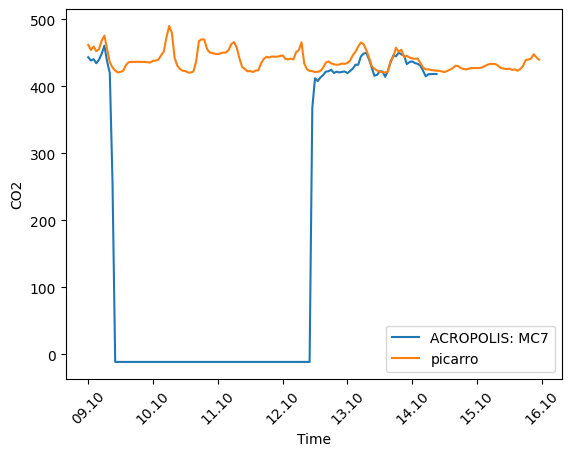

In [7]:
sns.lineplot(data=df_a.collect(), x="creation_timestamp", y="gmp343_compensated_corr", label = f"ACROPOLIS: MC{sensor_id}")
sns.lineplot(data=df_p.collect(), x="creation_timestamp", y="CO2_corr", label = "picarro")

# set axes labels
plt.xlabel("Time")
plt.ylabel('CO2')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

# show the plot
plt.show()

/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True

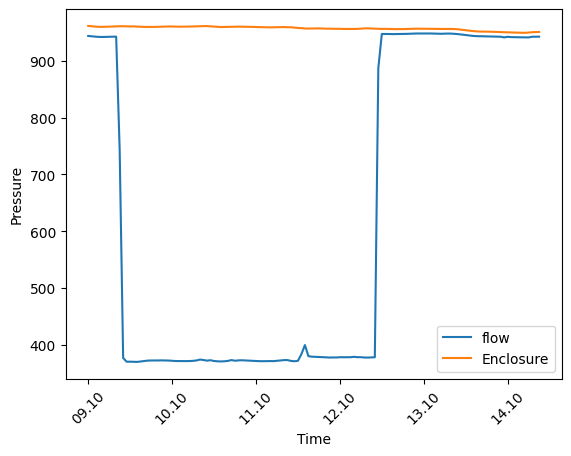

In [8]:
sns.lineplot(data=df_a.collect(), x="creation_timestamp", y="bme280_pressure", label = f"flow")
sns.lineplot(data=df_a.collect(), x="creation_timestamp", y="enclosure_bme280_pressure", label = f"Enclosure")

# set axes labels
plt.xlabel("Time")
plt.ylabel('Pressure')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True

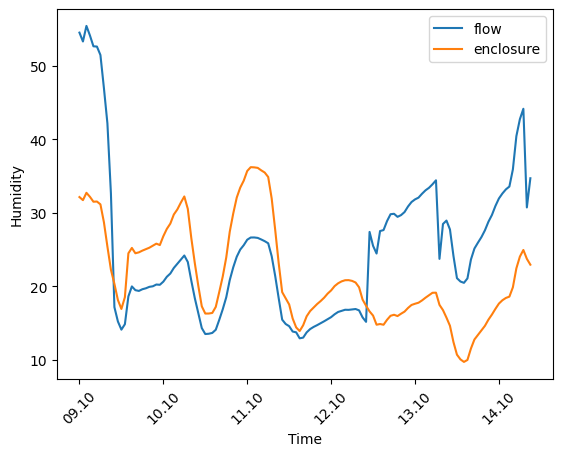

In [9]:
sns.lineplot(data=df_a.collect(), x="creation_timestamp", y="sht45_humidity", label = f"flow")
sns.lineplot(data=df_a.collect(), x="creation_timestamp", y="enclosure_bme280_humidity", label = f"enclosure")

# set axes labels
plt.xlabel("Time")
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True

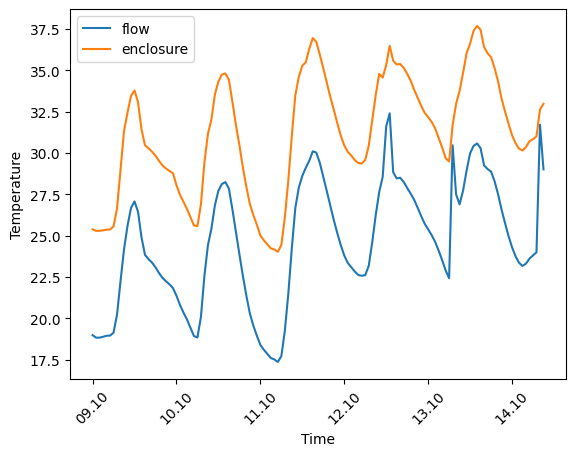

In [10]:
sns.lineplot(data=df_a.collect(), x="creation_timestamp", y="sht45_temperature", label = f"flow")
sns.lineplot(data=df_a.collect(), x="creation_timestamp", y="enclosure_bme280_temperature", label = f"enclosure")

# set axes labels
plt.xlabel("Time")
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

In [12]:
df = df_a.join(df_p, left_on= "creation_timestamp", right_on= "creation_timestamp")
df.tail(3).collect()

creation_timestamp,system_name,revision,receipt_timestamp,wxt532_direction_min,wxt532_speed_min,wxt532_last_update_time,wxt532_speed_avg,wxt532_direction_avg,wxt532_direction_max,wxt532_speed_max,gmp343_compensated,bme280_humidity,sht45_temperature,bme280_pressure,sht45_humidity,gmp343_raw,bme280_temperature,gmp343_filtered,gmp343_temperature,enclosure_bme280_humidity,raspi_cpu_usage,enclosure_bme280_pressure,raspi_cpu_temperature,raspi_disk_usage,raspi_memory_usage,enclosure_bme280_temperature,cal_gmp343_compensated,cal_gmp343_raw,cal_bme280_temperature,cal_gmp343_filtered,cal_sht45_temperature,cal_bme280_pressure,cal_sht45_humidity,cal_gmp343_temperature,cal_bme280_humidity,cal_bottle_id,gmp343_compensated_corr,DATE,TIME,FRAC_DAYS_SINCE_JAN1,FRAC_HRS_SINCE_JAN1,JULIAN_DAYS,EPOCH_TIME,ALARM_STATUS,INST_STATUS,CavityPressure,CavityTemp,DasTemp,EtalonTemp,species,OutletValve,CH4,CH4_dry,CO2,CO2_dry,h2o_reported,ch4_base,ch4_pzt_std,co2_base,co2_pzt_std,wlm1_offset,wlm2_offset,datetime,__index_level_0__,CO2_corr
"datetime[ns, UTC]",str,f64,"datetime[ns, UTC]",f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,datetime[ns],f64,f64
2023-10-14 07:00:00 UTC,null,16.0,null,285.888889,2.588889,1.6973e9,3.081481,296.518519,307.407407,3.444444,423.078273,41.140251,23.99468,942.848106,44.177131,379.793593,23.876936,423.038997,25.212535,24.944815,0.033407,950.81037,51.337037,0.45,0.145037,31.007778,null,null,null,null,null,null,null,null,null,null,418.027663,null,null,286.312482,6871.49957,287.312482,1.6973e9,0.0,963.0,139.999691,44.999886,38.867633,45.15654,2.035461,22271.250665,1.94986,1.984453,412.41829,421.363431,1.704318,1180.63123,85.574146,1084.244838,68.099878,-0.074327,-0.044748,null,709704.5,424.120416
2023-10-14 08:00:00 UTC,null,16.0,null,281.714286,2.985714,1.6973e9,3.464286,289.0,295.928571,3.835714,423.257062,26.599887,31.716215,942.837514,30.737006,377.657627,31.553446,424.00565,26.381356,23.735,0.033714,951.02,53.307143,0.45,0.146786,32.635714,539.418132,483.197802,27.660165,538.762637,27.804066,946.531923,1.672527,25.603297,0.939945,19.043956,418.209176,null,null,286.354327,6872.503838,287.354327,1.6973e9,0.0,963.0,140.000556,45.000045,39.008075,45.157437,2.006211,22278.199605,1.948323,1.983695,411.564018,420.699571,1.741873,1180.671258,84.444484,1084.259659,67.606034,-0.074231,-0.044726,null,711657.5,423.452325
2023-10-14 09:00:00 UTC,null,16.0,null,280.125,2.575,1.6973e9,3.05,293.0,298.875,3.8125,423.138835,31.052233,29.013495,942.95233,34.714272,377.216505,28.862233,423.216505,26.803883,22.94125,0.0335,951.2825,52.875,0.45,0.1475,32.9775,null,null,null,null,null,null,null,null,null,null,418.089148,null,null,286.395641,6873.495396,287.395641,1.6973e9,0.0,963.0,139.999925,44.999988,38.93187,45.156776,2.019403,22291.384735,1.949829,1.983543,411.47931,420.179762,1.663856,1180.622721,85.538738,1084.240122,67.157751,-0.074115,-0.04475,null,713628.5,422.929202


/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='gmp343_compensated_corr', ylabel='CO2_corr'>

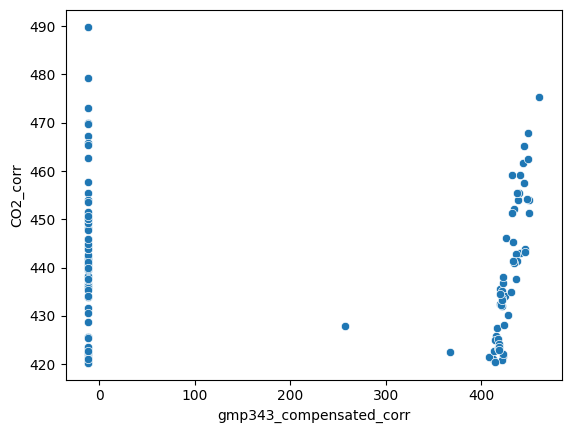

In [13]:
sns.scatterplot(data = df.collect(), x= "gmp343_compensated_corr", y = "CO2_corr" )